In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

## 1. KMeans

### 1.1 Prepare datasets

In [2]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[0.2,2.3],
     [-1.5,2.3],
     [-2.8,1.8],
     [-2.8,2.8],
     [-2.8,1.3]])

blob_std =np.array([0.4,0.3,0.1,0.1,0.1]) 

In [3]:
X, y = make_blobs(n_samples=2000,centers=blob_centers,
                     cluster_std = blob_std,random_state=7)

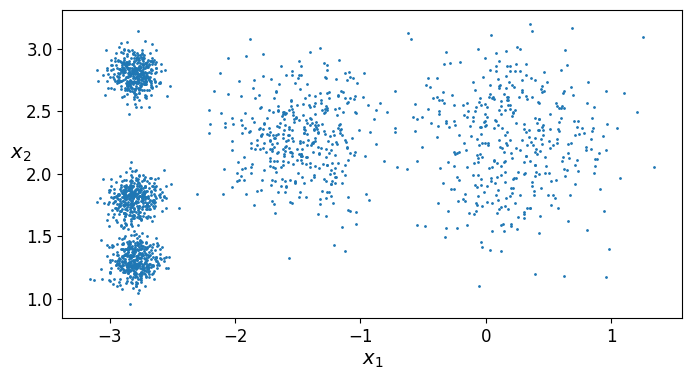

In [4]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

### 1.2 Run KMeans

In [5]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters = k,random_state=42)
y_pred = kmeans.fit_predict(X)

In [6]:
y_pred, kmeans.labels_

(array([4, 0, 1, ..., 2, 1, 0]), array([4, 0, 1, ..., 2, 1, 0]))

In [7]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [8]:
# Do some predictions
X_new = np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

In [9]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [10]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='r'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=15, linewidths=15,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True, title='Clustering Result'):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom='off')
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft='off')
    plt.title(title)

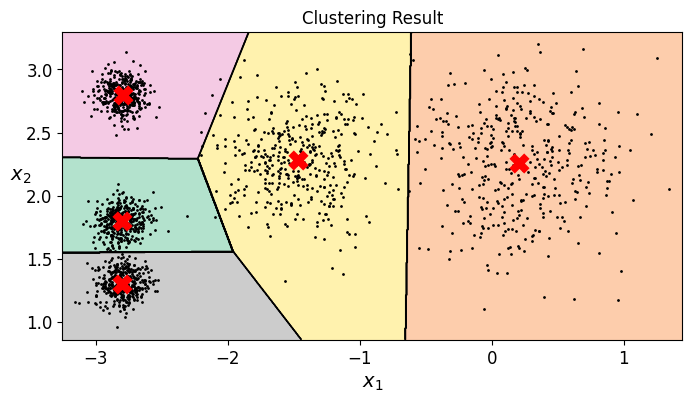

In [11]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

### 1.3 See the procedure by adjusting iterations

In [12]:
kmeans_iter1 = KMeans(n_clusters = 5,init = 'random',n_init = 1,max_iter=1,random_state=1)
kmeans_iter2 = KMeans(n_clusters = 5,init = 'random',n_init = 1,max_iter=2,random_state=1)
kmeans_iter3 = KMeans(n_clusters = 5,init = 'random',n_init = 1,max_iter=3,random_state=1)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=5, n_init=1, random_state=1)

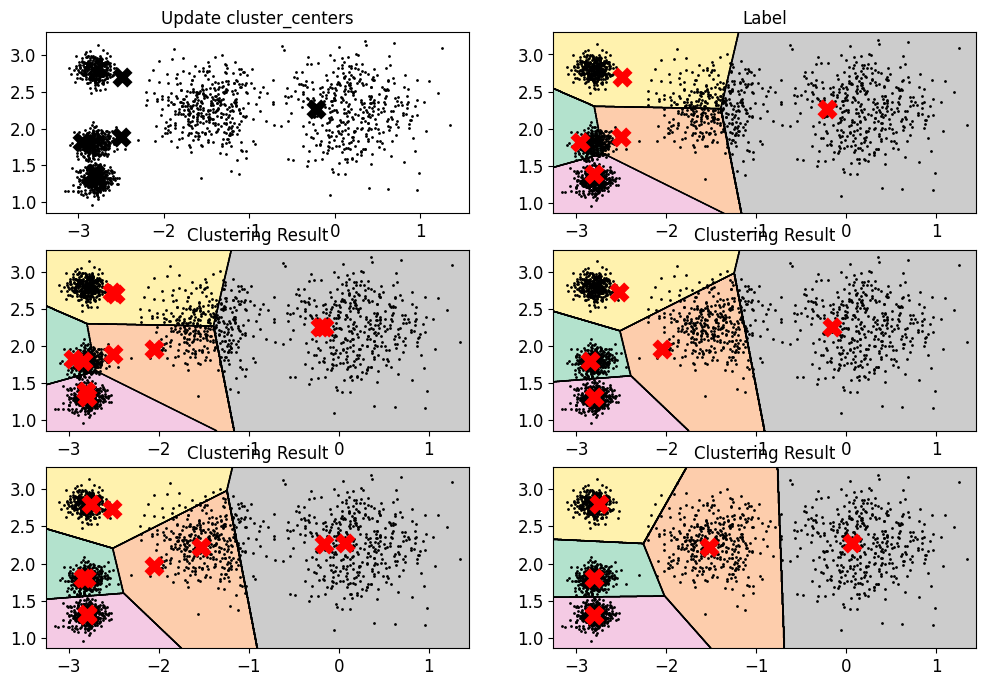

In [13]:
plt.figure(figsize=(12,8))
plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='k')
plt.title('Update cluster_centers')

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X,show_xlabels=False, show_ylabels=False)
plt.title('Label')

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X,show_xlabels=False, show_ylabels=False)
plot_centroids(kmeans_iter2.cluster_centers_,)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X,show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X,show_xlabels=False, show_ylabels=False)
plot_centroids(kmeans_iter3.cluster_centers_,)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X,show_xlabels=False, show_ylabels=False)

plt.show()

### 1.4 Instability of KMeans

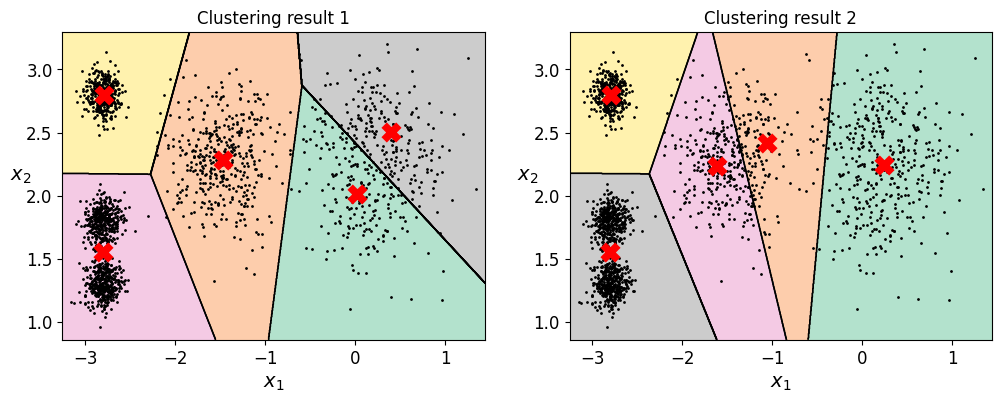

In [14]:
c1 = KMeans(n_clusters = 5,init='random',n_init = 1,random_state=11)
c2 = KMeans(n_clusters = 5,init='random',n_init = 1,random_state=19)
c1.fit(X)
c2.fit(X)
plt.figure(figsize=(12,4))
plt.subplot(121)
plot_decision_boundaries(c1,X,title='Clustering result 1')
plt.subplot(122)
plot_decision_boundaries(c2,X,title='Clustering result 2')

### 1.5 Evaluate KMeans

We use inertia (sum of distances from each point to its correspounding centroid)

In [15]:
kmeans.inertia_

211.59853725816836

In [16]:
# Use transform to find distances
X_dist = kmeans.transform(X)
X_dist

array([[0.46779778, 3.04611916, 1.45402521, 1.54944305, 0.11146795],
       [0.07122059, 3.11541584, 0.99002955, 1.48612753, 0.51431557],
       [3.81713488, 1.32016676, 4.09069201, 2.67154781, 3.76340605],
       ...,
       [0.92830156, 3.04886464, 0.06769209, 1.40795651, 1.42865797],
       [3.10300136, 0.14895409, 3.05913478, 1.71125   , 3.23385668],
       [0.22700281, 2.8625311 , 0.85434589, 1.21678483, 0.67518173]])

In [17]:
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_] ** 2)

211.5985372581685

In [18]:
# score = -inertia
kmeans.score(X)

-211.59853725816834

### 1.6 Finding the best K for KMeans

Inertia should decrease when we increase the value of K

In [19]:
kmeans_per_k = [KMeans(n_clusters = k).fit(X) for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

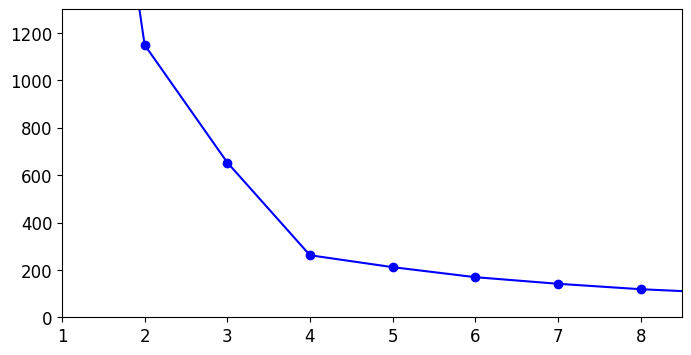

In [20]:
plt.figure(figsize=(8,4))
plt.plot(range(1,10),inertias,'bo-')
plt.axis([1,8.5,0,1300])
plt.show()

#### Silhouette scores
- $a_i$: calculate sample i's distance ($a_i$) to other samples in the same cluster. The smaller the $a_i$, the more likely that sample i belongs to the current cluster.
- $b_i$: calculate the average of sample i's distance ($b_{ij}$) to all samples in a different cluster j. $b_i=\min\{b_{i1}, b_{i2}, \dots, b_{ik}\}$

Now we define $s_i$

![title](./img/3.png)

* $s_i \rightarrow 1$: $i$ should belong to the current cluster
* $s_i \rightarrow -1$: $i$ should not belong to the current cluster
* $s_i \rightarrow 0$: $i$ is on the verge of two clusters

In [21]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [22]:
kmeans_per_k

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9)]

In [23]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

In [24]:
silhouette_scores

[0.5966442557582528,
 0.5723900247411775,
 0.688531617595759,
 0.655517642572828,
 0.602433506629666,
 0.6068660656395705,
 0.561138795623175,
 0.5668088143650577]

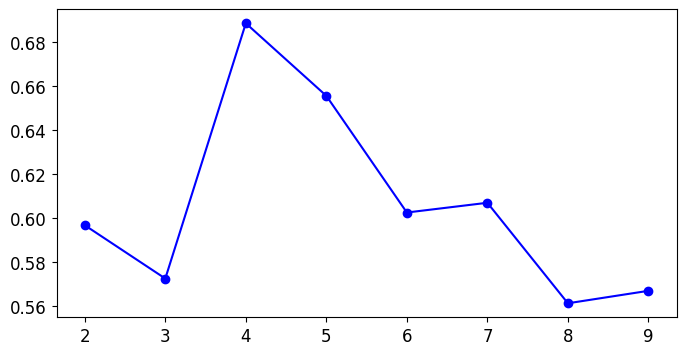

In [25]:
plt.figure(figsize=(8,4))
plt.plot(range(2,10),silhouette_scores,'bo-')
plt.show()

Therefore, we know that $K=4$ is the best choice.

### 1.7 Issues of KMeans

Issues of KMeans include:
* Hard to determine K
* Complexity increases significantly as inupt size increases
* Hard to cluster when the input data aren't regular in shape
* Depend too much on initialization

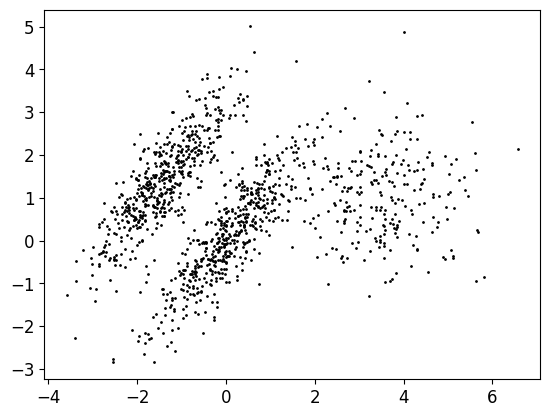

In [26]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

plot_data(X)

In [27]:
kmeans_good = KMeans(n_clusters=3,init=np.array([[-1.5,2.5],[0.5,0],[4,0]]),n_init=1,random_state=42)
kmeans_bad = KMeans(n_clusters=3,random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

Text(0.5, 1.0, 'Bad - inertia = 2179.4842787447324')

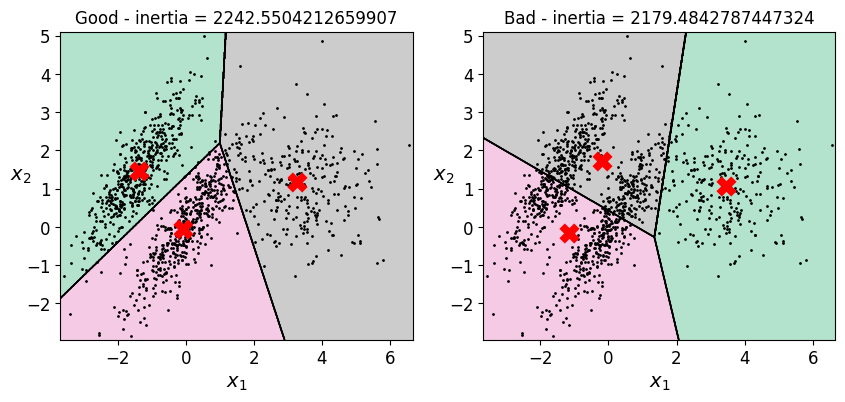

In [28]:
plt.figure(figsize = (10,4))
plt.subplot(121)
plot_decision_boundaries(kmeans_good,X)
plt.title('Good - inertia = {}'.format(kmeans_good.inertia_))

plt.subplot(122)
plot_decision_boundaries(kmeans_bad,X)
plt.title('Bad - inertia = {}'.format(kmeans_bad.inertia_))

### 1.8 An application of KMeans

In the example, we cluster all the colors in an image, and reproduce the image by only using the centroids to represent the original colors

In [29]:
from matplotlib.image import imread
image = imread('ladybug.png')
image.shape

(533, 800, 3)

In [30]:
X = image.reshape(-1,3)
X.shape

(426400, 3)

In [31]:
kmeans = KMeans(n_clusters = 8, random_state=42).fit(X)
kmeans.cluster_centers_

array([[0.9835214 , 0.9358936 , 0.02575076],
       [0.02288038, 0.11069143, 0.00578684],
       [0.21914566, 0.38675916, 0.05800836],
       [0.757677  , 0.21229179, 0.04460662],
       [0.09991631, 0.25424522, 0.01694096],
       [0.6126616 , 0.63010174, 0.38750774],
       [0.37211782, 0.5235983 , 0.15730573],
       [0.88459164, 0.72559035, 0.0344185 ]], dtype=float32)

Text(0.5, 1.0, 'The image with 8 colors')

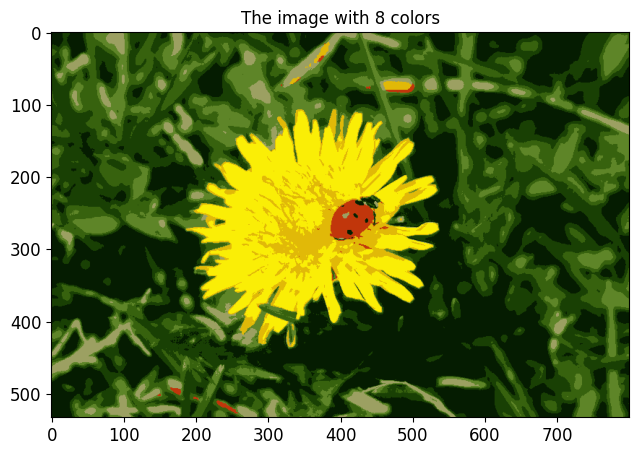

In [32]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_].reshape(533, 800, 3)
plt.figure(figsize=(10,5))
plt.imshow(segmented_img)
plt.title('The image with 8 colors')

In [ ]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_cluster in n_colors:
    kmeans = KMeans(n_clusters = n_cluster,random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(231)
plt.imshow(image)
plt.title('Original image')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232+idx)
    plt.imshow(segmented_imgs[idx])
    plt.title('{} colors'.format(n_clusters))

### 1.9 Semi-supervised learning using KMeans

In the following digit recognition task, we first break the training test to 50 clusters.

Then, we use the 50 centroids to make them as the representative figures.

In [ ]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y = True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits,y_digits,random_state=42)

In [ ]:
y_train.shape

In [ ]:
# Choose the first 50 samples to perform LogisticRegression first
from sklearn.linear_model import LogisticRegression
n_labeled = 50

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

In [ ]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)

# Calculate the distances from the 1347 samples to the 50 centroids
X_digits_dist = kmeans.fit_transform(X_train)
X_digits_dist.shape

In [ ]:
# Select the sample with the minimum distance to be the representative sample
representative_digits_idx = np.argmin(X_digits_dist,axis=0)
representative_digits_idx.shape

In [ ]:
# Show the representative samples
X_representative_digits = X_train[representative_digits_idx]
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [ ]:
y_representative_digits = np.array([
    9, 8, 1, 1, 2, 6, 0, 7, 5, 4,
    7, 0, 3, 8, 1, 2, 4, 9, 9, 8,
    2, 6, 0, 9, 7, 5, 3, 7, 9, 7,
    1, 2, 1, 4, 4, 5, 2, 1, 5, 2,
    3, 5, 8, 6, 7, 4, 5, 7, 8, 6
])

In [ ]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

Now, we apply the representative labels to all samples in the training set based on the cluster they belong to.

In [ ]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
    
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

We can do one step further: the top 20 samples with the closest distance to the centroids will use their original labels, other samples will use the representative labels.

In [ ]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster] # Select all samples belonging to the cluster
    cutoff_distance = np.percentile(cluster_dist, percentile_closest) # Select the 20 closest samples
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [ ]:
partially_propagated = (X_cluster_dist != -1)
print(partially_propagated)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [ ]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

In [ ]:
log_reg.score(X_test, y_test)

## 2. DBSCAN

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [ ]:
plt.plot(X[:,0],X[:,1],'b.')

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.05, min_samples=5)
dbscan.fit(X)

In [ ]:
dbscan.labels_[:10]

In [ ]:
dbscan.core_sample_indices_[:10]

In [ ]:
np.unique(dbscan.labels_)

In [ ]:
# Choose another eps value
dbscan2 = DBSCAN(eps = 0.2,min_samples=5)
dbscan2.fit(X)

In [ ]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom='off')
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft='off')
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

In [ ]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()